In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sys

In [2]:
data = pd.read_csv("/content/column_2C_weka.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
data.shape #(row,column)

(310, 7)

In [7]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [8]:
data.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


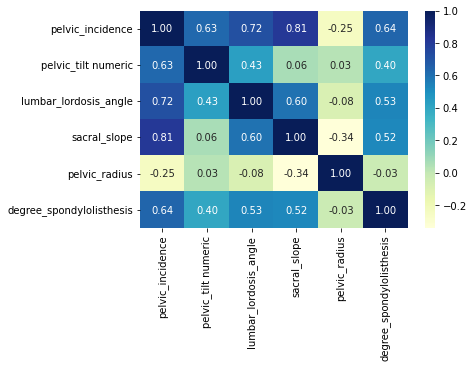

In [20]:
sns.heatmap(data.corr(), annot=True,fmt=".2f",cmap="YlGnBu")
plt.show()

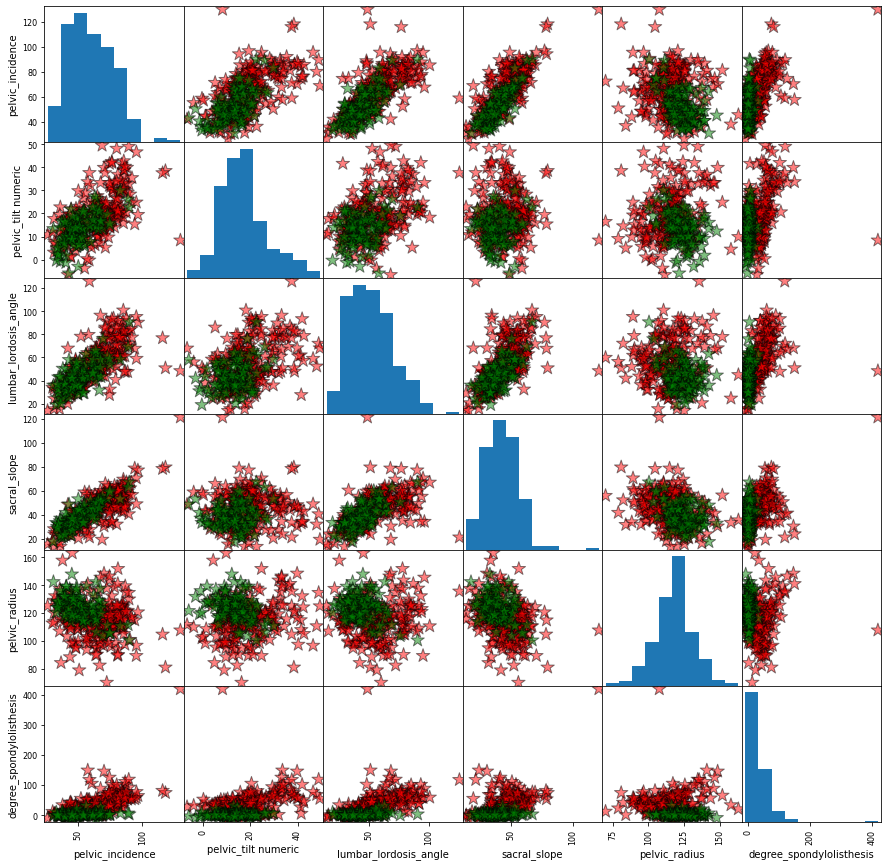

In [9]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],c=color_list,figsize= [15,15],diagonal='hist',
                                       alpha=0.5,s = 200,marker = '*',edgecolor= "black")                             
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

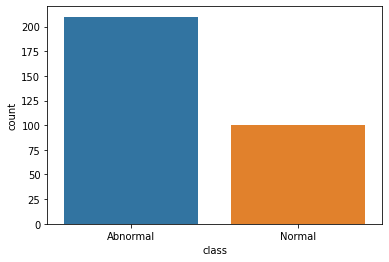

In [10]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.8602150537634409


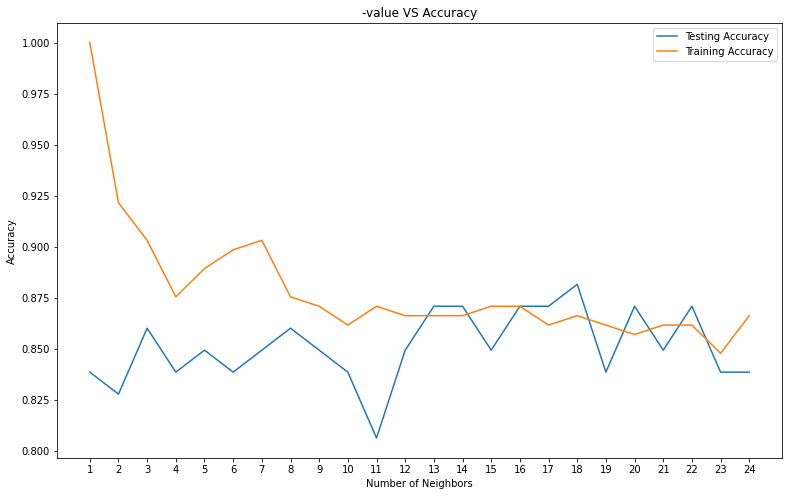

Best accuracy is 0.8817204301075269 with K = 18


In [13]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [23]:
y_pred=knn.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[56, 10],
       [ 5, 22]])

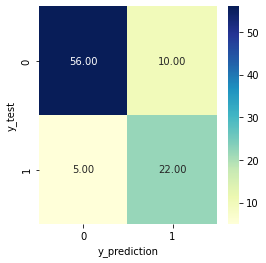

In [27]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

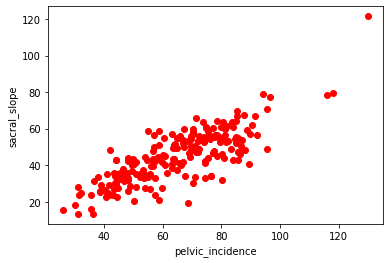

In [93]:
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
plt.scatter(x=x,y=y,color='red')
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [31]:
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)

In [32]:
reg.fit(x,y)

LinearRegression()

In [33]:
predicted = reg.predict(predict_space)

In [34]:
b0_ = reg.intercept_
print("b0_: ",b0_)

b0_:  [2.17390961]


In [37]:
b1_=reg.coef_
print("b1_: ",b1_)

b1_:  [[0.66047069]]


In [38]:
print('R^2 score: ',reg.score(x, y))

R^2 score:  0.6458410481075871


In [45]:
import sklearn.metrics as metrics
lr_MSE=metrics.mean_squared_error(x, y)
print("MSE Score:", lr_MSE)

MSE Score: 501.74504979461653


In [56]:
import sklearn.metrics as metrics
print('MAE:', metrics.mean_absolute_error(x, y))

MAE: 19.891838739619047


In [49]:
import sklearn.metrics as metrics
lr_RMSE=np.sqrt(metrics.mean_squared_error(x, y))
print("RMSE Score:", lr_RMSE)

RMSE Score: 22.3996662875726


In [53]:
from math import sqrt
rms = sqrt(lr_MSE)
print("RMSE Score:",rms)

RMSE Score: 22.3996662875726


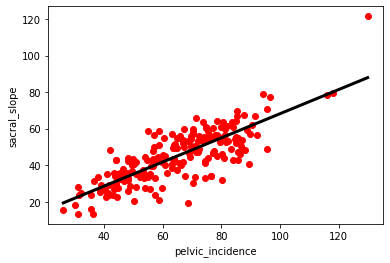

In [55]:
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y,color='red')
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [57]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.3931462502884869


In [59]:
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.5608287918841997


In [60]:
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9640334804327547
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


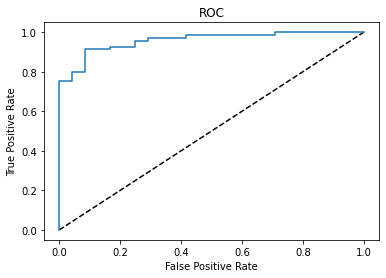

In [74]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [62]:
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4,n_estimators = 100)

In [63]:
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

random forest algo result:  0.8494623655913979


In [64]:
y_pred=rf.predict(x_test)
y_pred

array(['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Normal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[60,  6],
       [ 8, 19]])

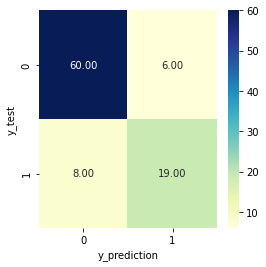

In [66]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(cm,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

In [67]:
Acc = []
for i in range (1,100):
  from sklearn.ensemble import RandomForestClassifier
  rf = RandomForestClassifier(n_estimators = i,max_depth=3,random_state = 1)
  rf.fit(x_train,y_train)
  Acc.append(rf.score(x_test,y_test))

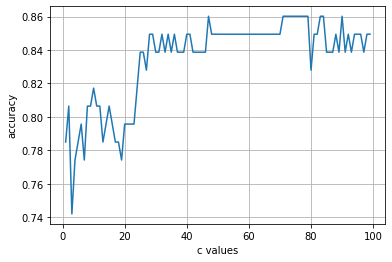

In [68]:
plt.plot(range(1,100),Acc)
plt.xlabel("c values")
plt.ylabel("accuracy")
plt.grid()
plt.show()

In [69]:
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
matrix

array([[58,  8],
       [ 6, 21]])

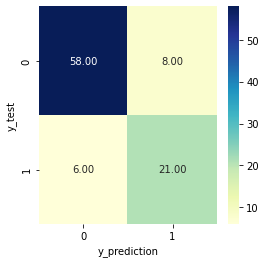

In [70]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

In [71]:
Acc = []
for i in range (1,6):
  for j in range(1,100):
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = j,max_depth=i,random_state = 1)
    rf.fit(x_train,y_train)
    Acc.append(rf.score(x_test,y_test))

In [72]:
len(Acc)

495

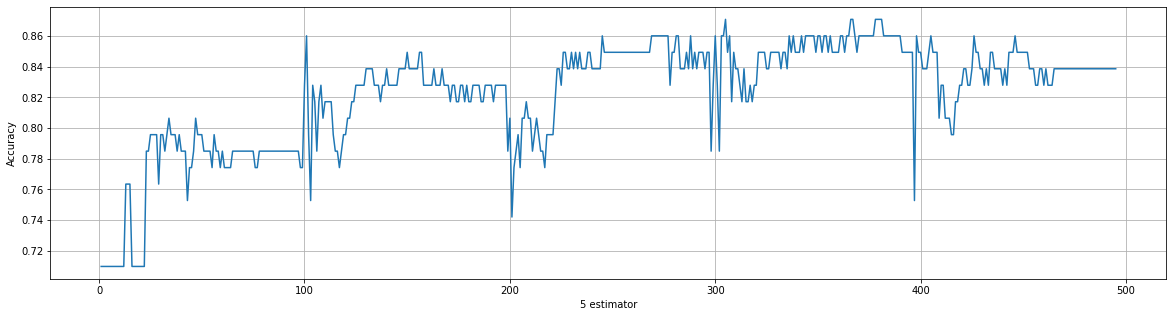

In [73]:
plt.figure(figsize=(20,5))
plt.plot(range(1,496),Acc)
plt.xlabel("5 estimator")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

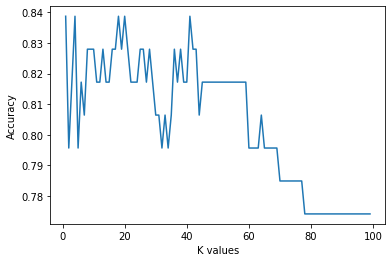

In [76]:
from sklearn.neighbors import KNeighborsClassifier
score_list = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))    
plt.plot(range(1,100),score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()

In [79]:
y_pred = knn.predict(x_test)
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
matrix

array([[22,  2],
       [19, 50]])

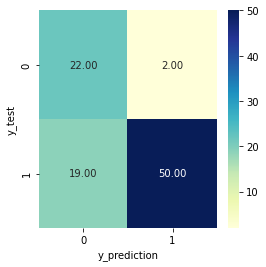

In [80]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
Acc=[]
for i in range(1,100):
  model_svm = SVC(C=i)
  model_svm.fit(x_train,y_train)
  y_pred = model_svm.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  print("C: ",i,"Accuracy Score = ",acc)
  Acc.append(acc)

C:  1 Accuracy Score =  0.8279569892473119
C:  2 Accuracy Score =  0.8279569892473119
C:  3 Accuracy Score =  0.8387096774193549
C:  4 Accuracy Score =  0.8602150537634409
C:  5 Accuracy Score =  0.8602150537634409
C:  6 Accuracy Score =  0.8602150537634409
C:  7 Accuracy Score =  0.8602150537634409
C:  8 Accuracy Score =  0.8709677419354839
C:  9 Accuracy Score =  0.8602150537634409
C:  10 Accuracy Score =  0.8709677419354839
C:  11 Accuracy Score =  0.8817204301075269
C:  12 Accuracy Score =  0.8709677419354839
C:  13 Accuracy Score =  0.8709677419354839
C:  14 Accuracy Score =  0.8709677419354839
C:  15 Accuracy Score =  0.8602150537634409
C:  16 Accuracy Score =  0.8494623655913979
C:  17 Accuracy Score =  0.8494623655913979
C:  18 Accuracy Score =  0.8602150537634409
C:  19 Accuracy Score =  0.8602150537634409
C:  20 Accuracy Score =  0.8602150537634409
C:  21 Accuracy Score =  0.8602150537634409
C:  22 Accuracy Score =  0.8602150537634409
C:  23 Accuracy Score =  0.86021505376344

In [84]:
max(Acc)

0.8817204301075269

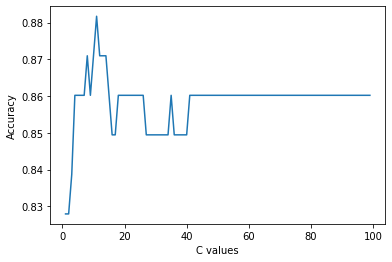

In [86]:
plt.plot(range(1,100),Acc)
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.show()

In [88]:
y_pred = model_svm.predict(x_test)  
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1])

In [89]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
matrix

array([[17,  7],
       [ 6, 63]])

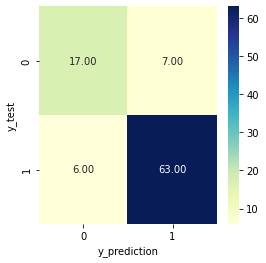

In [90]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

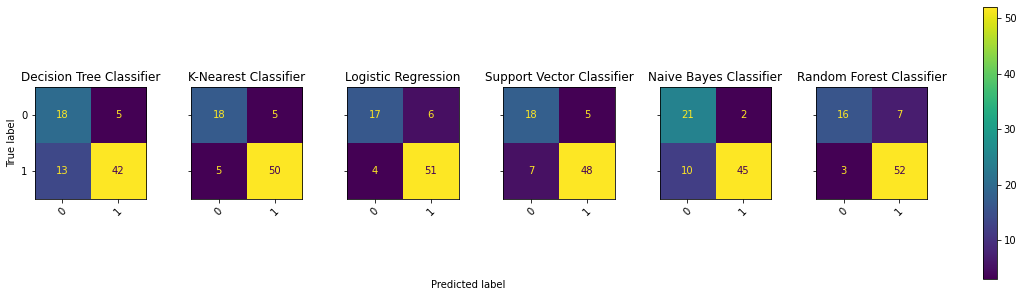

In [92]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Classifier": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators = 100,random_state = 1),
}

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= 0.25, random_state=1)

f, axes = plt.subplots(1, 6, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(x_train, y_train).predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.4, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()